In [206]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import mean_squared_error, r2_score

In [208]:
df= pd.read_csv('loan_approval_dataset.csv')

In [210]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [212]:
#EDA
#Uni varient anlysis ----->count plot , Scatterplotdisturbition 
#bi-->Vairent -->imp colums relations  b/w target column and independent colum 
#categorcal data into--->numerical 
#numerical data -->feature scaling 
#load model--->pred

In [214]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [216]:
df.isnull().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [218]:
df.head(2)

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected


In [220]:
df.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [223]:
df_copy = df.copy()

In [225]:
df.drop('loan_id',axis=1,inplace=True)

In [227]:
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [229]:
df[' no_of_dependents'].unique()

array([2, 0, 3, 5, 4, 1], dtype=int64)

In [231]:
for i in df.columns:
    print (i,df[i].unique())
    print('-'*80)

 no_of_dependents [2 0 3 5 4 1]
--------------------------------------------------------------------------------
 education [' Graduate' ' Not Graduate']
--------------------------------------------------------------------------------
 self_employed [' No' ' Yes']
--------------------------------------------------------------------------------
 income_annum [9600000 4100000 9100000 8200000 9800000 4800000 8700000 5700000  800000
 1100000 2900000 6700000 5000000 1900000 4700000  500000 2700000 6300000
 5800000 6500000 4900000 3100000 2400000 7000000 9000000 8400000 1700000
 1600000 8000000 3600000 1500000 7800000 1400000 4200000 5500000 9500000
 7300000 3800000 5100000 4300000 9300000 7400000 8500000 8800000 3300000
 3900000 8300000 5600000 5300000 2600000  700000 3500000 9900000 3000000
 6800000 2000000 1000000  300000 6600000 9400000 4400000  400000 6200000
 9700000 7100000  600000 7200000  900000  200000 1800000 4600000 2200000
 2500000 8600000 4000000 5200000 8900000 1300000 4500000

In [233]:
df[' education']=df[' education']=df[' education'].map({' Graduate':1,' Not Graduate':0})

In [235]:
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,1,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,0,0,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,1,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,3,1,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,0,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [237]:
df[' self_employed']= df[' self_employed'].map({' Yes':1, ' No':0})

In [239]:
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,1,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,0,0,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,1,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,3,1,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,0,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [241]:
df[' loan_status']=df[' loan_status'].map({' Approved':1, ' Rejected':0})

In [243]:
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,1,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1
1,0,0,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0
2,3,1,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0
3,3,1,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0
4,5,0,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0


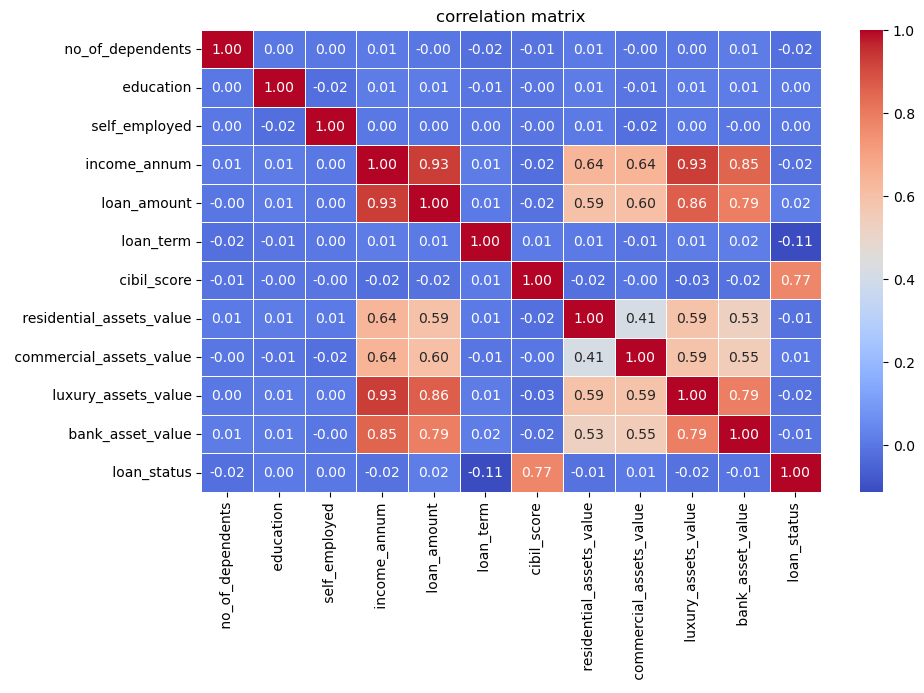

In [245]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True,fmt='.2f',cmap='coolwarm',linewidths=0.5)
plt.title('correlation matrix')
plt.show()

In [247]:
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,1,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1
1,0,0,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0
2,3,1,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0
3,3,1,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0
4,5,0,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0


In [255]:
X= df.iloc[:,:-1]
y=df[' loan_status']

In [259]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.28,random_state=42)

In [261]:
scalar= StandardScaler()

In [263]:
X_train_Scaled= scalar.fit_transform(X_train)
X_test_scaled=scalar.transform(X_test)

In [265]:
#model build 

In [267]:
model = LogisticRegression()

In [269]:
model.fit(X_train_Scaled,y_train)

LogisticRegression()

In [271]:
y_pred= model.predict(X_test_scaled)

In [275]:
ac_score= accuracy_score(y_test,y_pred)

In [277]:
print(ac_score)

0.9021739130434783


In [281]:
report = classification_report(y_test,y_pred)

In [283]:
print(report)

              precision    recall  f1-score   support

           0       0.87      0.86      0.87       438
           1       0.92      0.93      0.92       758

    accuracy                           0.90      1196
   macro avg       0.90      0.89      0.89      1196
weighted avg       0.90      0.90      0.90      1196

